# Linear discriminant analysis freddes.

In [37]:
%matplotlib inline
# first som imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

#data
c1 = Matrix([[1,0],
             [1,1],
             [2,2],
             [2,3]])
c2 = Matrix([[3,0],
             [3,1],
             [2,0]])
c3 = c1.row_insert(4,c2)
print("c1=\n"+ str(c1) + "\nc2=\n" + str(c2) + "\nc3=" + str(c3))

c1=
Matrix([[1, 0], [1, 1], [2, 2], [2, 3]])
c2=
Matrix([[3, 0], [3, 1], [2, 0]])
c3=Matrix([[1, 0], [1, 1], [2, 2], [2, 3], [3, 0], [3, 1], [2, 0]])


In [38]:
c1t = transpose(c1)
c2t = transpose(c2)
c3t = transpose(c3)
print(str(c1t)+ "\n" + str(c2t) + "\n" + str(c3t))

Matrix([[1, 1, 2, 2], [0, 1, 2, 3]])
Matrix([[3, 3, 2], [0, 1, 0]])
Matrix([[1, 1, 2, 2, 3, 3, 2], [0, 1, 2, 3, 0, 1, 0]])


In [21]:
temp = Matrix(c1t.tolist()[0]).normalized()
temp.evalf()

Matrix([
[0.316227766016838],
[0.316227766016838],
[0.632455532033676],
[0.632455532033676]])

In [46]:
c1mean= Matrix([np.mean(np.array(c1t.tolist()[0]).astype(np.float)),
          np.mean(np.array(c1t.tolist()[1]).astype(np.float))])
c2mean = Matrix([np.mean(np.array(c2t.tolist()[0]).astype(np.float)), 
          np.mean(np.array(c2t.tolist()[1]).astype(np.float))])
c3mean = Matrix([np.mean(np.array(c3t.tolist()[0]).astype(np.float)), 
          np.mean(np.array(c3t.tolist()[1]).astype(np.float))])
print(str(c1mean) + "\n" + str(c2mean) + "\n" + str(c3mean))

Matrix([[1.50000000000000], [1.50000000000000]])
Matrix([[2.66666666666667], [0.333333333333333]])
Matrix([[2.00000000000000], [1.00000000000000]])


# removing the mean form the data
by using vector addition.

In [70]:
c3mean.tolist()[1][0]

1.00000000000000

In [74]:
res = []
leng = np.arange(0, len(c1t.tolist()[0]))
for i in leng:
    print(i)
    x = c1.tolist()[i][0] - c3mean.tolist()[0][0]
    y = c1.tolist()[i][1] - c3mean.tolist()[1][0]
    res.append([x,y]) 
    
res

0
1
2
3


[[-1.00000000000000, -1.00000000000000],
 [-1.00000000000000, 0],
 [0, 1.00000000000000],
 [0, 2.00000000000000]]

In [293]:
def removemean(A, frommean=0,setlatex=0):
    ''' Removes the mean of an matrix
        A = Matrix with 2 rows x,y
        return A - mean
    '''
    if type(frommean)!=type(A):
        mean = Matrix([np.mean(np.array(A.tolist()[0]).astype(np.float)),
              np.mean(np.array(A.tolist()[1]).astype(np.float))])
    else: #mean is a matrix
        mean = Matrix([np.mean(np.array(frommean.tolist()[0]).astype(np.float)),
              np.mean(np.array(frommean.tolist()[1]).astype(np.float))])
    #print("mean=\n" + str(mean))
    data = A
    # remove mean form data.
    length = len(data.tolist()[0])
    temp = []
    for i in np.arange(0,length):
        x = data.tolist()[0][i] - mean.tolist()[0][0]
        y = data.tolist()[1][i] - mean.tolist()[1][0]
        #print("x=" + str(x) + " y=" + str(y))
        temp.append([x,y])
    temp = Matrix(temp)
    return temp
    
    
def covariance(A, setLatex=0):
    ''' Calculates the covariance of a matrix A.
        A = Matrix with 2 rows x,y
        setLatex = 0 is a condition to turn on latex printing of each math stepp.
        returns M=covariance matrix
    '''
    #from sympy import *
    #print("got the matrix\n" + str(A))
    mean = Matrix([np.mean(np.array(A.tolist()[0]).astype(np.float)),
          np.mean(np.array(A.tolist()[1]).astype(np.float))])
    #print("mean=\n" + str(mean))
    data = A
    # remove mean form data.
    length = len(data.tolist()[0])
    temp = []
    for i in np.arange(0,length):
        x = data.tolist()[0][i] - mean.tolist()[0][0]
        y = data.tolist()[1][i] - mean.tolist()[1][0]
        #print("x=" + str(x) + " y=" + str(y))
        temp.append([x,y])
    temp = Matrix(temp)
    #print("temp=" + str(temp))
    cov = 1/(length -1 )*transpose(temp)*temp
    #print("cov=\n" + str(cov))
    if setLatex == 1:
        print("\\begin{equation}")
        print("A=" + latex(A) + " \\Rightarrow")
        print("\\overline{x}^T=")
        print(str(latex(mean)))
        print("\\end{equation}")
        print("\\benin{equation}")
        print("\\text{norm}=" + str(latex(temp)))
        print("\\end{equation}")
        print("\\begin{equation}")
        print("M:=\\frac{1}{D-1}*\\text{norm}^T*\\text{norm}")
        print("\\end{equation")
        print("\\begin{equation}")
        print("m=" + str(1/(length -1)) + str(latex(transpose(temp))) + "*" + str(latex(temp)) + "=" + str(latex(cov)))
        print("\\end{equation}")
    return cov 
    
    
#test case
A = Matrix([[-4,2],
              [-3,1],
              [-1,0],
              [1,0] ,
              [3,-1],
              [4,-2]])
covariance_of_A= Matrix([[10.4, -4.4],
                        [-4.4, 2.0]])
M = covariance(transpose(A), setLatex=1)
print("M=\n" + str(M) + "\ncovariance_of_A=\n" + str(covariance_of_A))

\begin{equation}
A=\left[\begin{matrix}-4 & -3 & -1 & 1 & 3 & 4\\2 & 1 & 0 & 0 & -1 & -2\end{matrix}\right] \Rightarrow
\overline{x}^T=
\left[\begin{matrix}0.0\\0.0\end{matrix}\right]
\end{equation}
\benin{equation}
\text{norm}=\left[\begin{matrix}-4 & 2\\-3 & 1\\-1 & 0\\1 & 0\\3 & -1\\4 & -2\end{matrix}\right]
\end{equation}
\begin{equation}
M:=\frac{1}{D-1}*\text{norm}^T*\text{norm}
\end{equation
\begin{equation}
m=0.2\left[\begin{matrix}-4 & -3 & -1 & 1 & 3 & 4\\2 & 1 & 0 & 0 & -1 & -2\end{matrix}\right]*\left[\begin{matrix}-4 & 2\\-3 & 1\\-1 & 0\\1 & 0\\3 & -1\\4 & -2\end{matrix}\right]=\left[\begin{matrix}10.4 & -4.4\\-4.4 & 2.0\end{matrix}\right]
\end{equation}
M=
Matrix([[10.4000000000000, -4.40000000000000], [-4.40000000000000, 2.00000000000000]])
covariance_of_A=
Matrix([[10.4000000000000, -4.40000000000000], [-4.40000000000000, 2.00000000000000]])


# calculate covariance of each class

In [265]:
print(str(latex(A)))
def test(A):
    print("A=" + str(latex(A)))
    

    
test(A)

\left[\begin{matrix}-4 & 2\\-3 & 1\\-1 & 0\\1 & 0\\3 & -1\\4 & -2\end{matrix}\right]
A=\left[\begin{matrix}-4 & 2\\-3 & 1\\-1 & 0\\1 & 0\\3 & -1\\4 & -2\end{matrix}\right]


In [266]:
s1 = covariance(c1t, setLatex=0)
s2 = covariance(c2t, setLatex=1)

#print(str(s1))
#print(str(s2))

\begin{equation}
A=\left[\begin{matrix}3 & 3 & 2\\0 & 1 & 0\end{matrix}\right] \Rightarrow
\overline{x}^T=
\left[\begin{matrix}2.66666666666667\\0.333333333333333\end{matrix}\right]
\end{equation}
\benin{equation}
\text{norm}=\left[\begin{matrix}0.333333333333334 & -0.333333333333333\\0.333333333333334 & 0.666666666666667\\-0.666666666666666 & -0.333333333333333\end{matrix}\right]
\end{equation}
\begin{equation}
M:=\frac{1}{D-1}*\text{norm}^T*\text{norm}
\end{equation
\begin{equation}
m=0.5\left[\begin{matrix}0.333333333333334 & 0.333333333333334 & -0.666666666666666\\-0.333333333333333 & 0.666666666666667 & -0.333333333333333\end{matrix}\right]*\left[\begin{matrix}0.333333333333334 & -0.333333333333333\\0.333333333333334 & 0.666666666666667\\-0.666666666666666 & -0.333333333333333\end{matrix}\right]=\left[\begin{matrix}0.333333333333333 & 0.166666666666667\\0.166666666666667 & 0.333333333333333\end{matrix}\right]
\end{equation}


In [267]:
sw = s1 + s2
print("\\begin{equation}")
print("S_w = S_1 + S_2 = ")
print(str(latex(sw)))
print("\end{equation}")

\begin{equation}
S_w = S_1 + S_2 = 
\left[\begin{matrix}0.666666666666667 & 0.833333333333333\\0.833333333333333 & 2.0\end{matrix}\right]
\end{equation}


In [268]:
def pMatrix(m, decimals=3, setlatex=0):
    ''' Prints matrixes that are rounded in each cell to n decimals.
        m = sympy matrix
        decimals = nr of decimals that is needed
        pirts a rounded latex matrix
        return nothing
    '''
    temp = np.array(m.tolist()).astype(np.float)
    tr = temp.round(decimals)
    if setlatex == 0:
        print(str(tr))
    elif setlatex == 1:
        mx = Matrix(tr)
        print(str(latex(mx)))
    else:
        print("setlatex not rekognised")
    pass

pMatrix(sw, setlatex=1, decimals=3)

\left[\begin{matrix}0.667 & 0.833\\0.833 & 2.0\end{matrix}\right]


In [269]:
w = sw.inv()
pMatrix(w,decimals=3,setlatex=1)

\left[\begin{matrix}3.13 & -1.304\\-1.304 & 1.043\end{matrix}\right]


In [270]:
wstar = w * (c1mean -c2mean)
pMatrix(wstar,setlatex=1)

\left[\begin{matrix}-5.174\\2.739\end{matrix}\right]


In [271]:
kx = wstar.tolist()[0][0]/wstar.tolist()[1][0]
print("k=" + str(kx))

k=-1.88888888888889


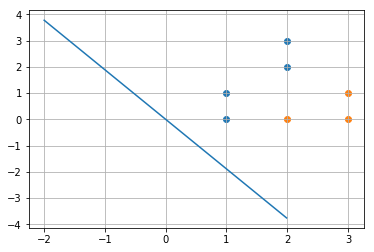

In [304]:
# plot of line and data
xAxis = np.arange(-2,2,0.01)
y = kx * xAxis


plt.scatter(c1t.tolist()[0], c1t.tolist()[1])
plt.scatter(c2t.tolist()[0], c2t.tolist()[1])
plt.plot(xAxis,y)
plt.grid()


In [305]:
# Test of projection
v1 = Matrix([[2],[1]])
v2 = Matrix([[1],[0]])
# proj v1 on v2
print("v1 on v2 gives" + str(v2.project(v1)))
print("v2 on v1 gives" + str(v1.project(v2)))

v1 on v2 givesMatrix([[4/5], [2/5]])
v2 on v1 givesMatrix([[2], [0]])


# projecting data on the line

c1=
[[ 1.  0.]
 [ 1.  1.]
 [ 2.  2.]
 [ 2.  3.]]
porj1=
[[ 0.     2.739]
 [-1.217 -1.217]
 [-1.217 -1.217]
 [-2.318 -1.545]]
proj1 transpose=
[[ 0.    -1.217 -1.217 -2.318]
 [ 2.739 -1.217 -1.217 -1.545]]


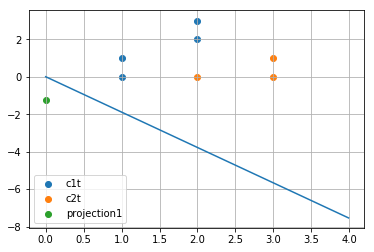

In [306]:
# Creating a projection matrix.
# project data on wstar vector.
proj1 = []
def getpos(m, pos=0):
    x = m.tolist()[1][pos]
    y = m.tolist()[0][pos]
    return [[x],[y]]
    
    
for i in np.arange(0,len(c1t.tolist()[0])):
    #v = Matrix(getpos(c1t, i))
    v = getpos(c1t, i)
    #print("x=" + str(x) + " y=" + str(y) + " v=" + str(v))
    p = wstar.project(transpose(Matrix(v)))
    proj1.append(p)
    #proj1.append(wstar.project(v).tolist())
    
proj2 = []
for i in np.arange(0, len(c2t.tolist()[0])):
    v = Matrix(getpos(c2t, i))
    proj2.append(wstar.project(v).tolist())
    
xAxis = np.arange(0,4,0.01)
y = kx * xAxis

proj1 = Matrix(proj1)
proj2 = Matrix(proj2)
print("c1=")
pMatrix(c1)
print("porj1=")
pMatrix(proj1)
proj1t = transpose(Matrix(proj1))
proj2t = transpose(Matrix(proj1))
print("proj1 transpose=")
pMatrix(proj1t)
plt.scatter(c1t.tolist()[0], c1t.tolist()[1],label="c1t")
plt.scatter(c2t.tolist()[0], c2t.tolist()[1], label="c2t")
plt.scatter(proj1t[0],proj1t[1],label="projection1")
#plt.scatter(proj2[0],proj2[1])
plt.plot(xAxis,y)
plt.legend()
plt.grid()

# Using the method in 1.3 to plot the data.

In [352]:
# eainvalue of w
print(w)
pMatrix(wstar)
wnp = np.matrix(w).astype(np.float)
print(wnp)
print("eginvals of wnp")
print(np.linalg.eigvals(wnp))
print("eignvectors of wnp")
eigval,eigvect = np.linalg.eig(wnp)
print(eigval)
print(eigvect)

Matrix([[3.13043478260870, -1.30434782608696], [-1.30434782608696, 1.04347826086956]])
[[-5.174]
 [ 2.739]]
[[ 3.13043478 -1.30434783]
 [-1.30434783  1.04347826]]
eginvals of wnp
[ 3.75733676  0.41657629]
eignvectors of wnp
[ 3.75733676  0.41657629]
[[ 0.90130324  0.43318873]
 [-0.43318873  0.90130324]]


In [337]:
# so the intresting eginval is 3.76 and the vector [[0.9],[-0.4]]
l1 = 3.75733676
v1 = Matrix([[0.90130324],
             [-0.43318873]])
TL1 = s1*v1
TL2 = s2*v1
XL1 = TL1 * transpose(v1)
XL2 = TL2 * transpose(v1)
XL1T = transpose(XL1).tolist()
XL2T = transpose(XL1).tolist()

In [338]:
pMatrix(XL1, setlatex=0)
pMatrix(XL2, setlatex=0)
pMatrix(Matrix(XL1T))
pMatrix(Matrix(XL2T))

[[ 0.01  -0.005]
 [-0.109  0.052]]
[[ 0.206 -0.099]
 [ 0.005 -0.003]]
[[ 0.01  -0.109]
 [-0.005  0.052]]
[[ 0.01  -0.109]
 [-0.005  0.052]]


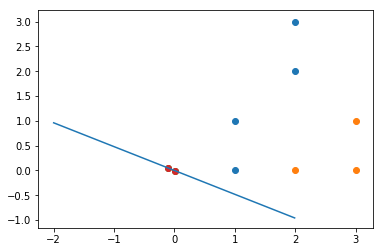

In [339]:
# plot the data.
v1temp = v1.tolist()
xAxis = np.arange(-2,2,0.01)
yline = xAxis*v1temp[1][0]/v1temp[0][0]


plt.plot(xAxis, yline)
plt.scatter(c1t.tolist()[0], c1t.tolist()[1],label="c1t")
plt.scatter(c2t.tolist()[0], c2t.tolist()[1], label="c2t")
plt.scatter(XL1T[0],XL1T[1])
plt.scatter(XL2T[0],XL2T[1])

In [340]:
print(s1.tolist())

[[0.333333333333333, 0.666666666666667], [0.666666666666667, 1.66666666666667]]


In [366]:
normdata1 = transpose(removemean(c1t,frommean=c3t)).tolist()
normdata2 = transpose(removemean(c2t,frommean=c3t)).tolist()
#print(normdata1)


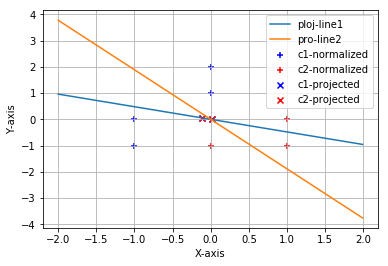

In [402]:
#plt.scatter(c1t.tolist()[0], c1t.tolist()[1],label="c1t",c='b')
#plt.scatter(c2t.tolist()[0], c2t.tolist()[1], label="c2t",c='r')
plt.scatter(normdata1[0],normdata1[1],marker='+',c='b', label="c1-normalized")
plt.scatter(normdata2[0],normdata2[1],marker='+',c='r', label="c2-normalized")
plt.plot(xAxis, yline, label="ploj-line1")
plt.plot(xAxis, wkx, label="pro-line2")
plt.scatter(XL1T[0],XL1T[1],marker='x',c='b', label="c1-projected")
plt.scatter(XL2T[0],XL2T[1],marker='x',c='r', label="c2-projected")
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.savefig("proj1_4.jpg")

In [343]:
XL1T

[[0.0104929062245090, -0.109158989511144],
 [-0.00504315142748645, 0.0524645224113647]]

In [344]:
XL2T

[[0.0104929062245090, -0.109158989511144],
 [-0.00504315142748645, 0.0524645224113647]]

In [368]:
pMatrix(wstar)
wkx = xAxis*(-5.174/2.739)
pMatrix(w)
pMatrix(c1t)

[[-5.174]
 [ 2.739]]
[[ 3.13  -1.304]
 [-1.304  1.043]]
[[ 1.  1.  2.  2.]
 [ 0.  1.  2.  3.]]


In [396]:
projc1t = []
for i in np.arange(0, len(c1t.tolist()[0])):
    #print(c1t.tolist()[0][i])
    temp = Matrix([[c1t.tolist()[0][i]],
                   [c1t.tolist()[1][i]]])
    ywx = transpose(w) * temp
    projc1t.append([ywx.tolist()[0][0], ywx.tolist()[1][0]]) 
    #print(ywx.tolist()[0][0])
    
projc1t = Matrix(projc1t)
pMatrix(projc1t)
projc1list= transpose(projc1t).tolist()
print(projc1list)

[[ 3.13  -1.304]
 [ 1.826 -0.261]
 [ 3.652 -0.522]
 [ 2.348  0.522]]
[[3.13043478260870, 1.82608695652174, 3.65217391304348, 2.34782608695652], [-1.30434782608696, -0.260869565217391, -0.521739130434782, 0.521739130434783]]


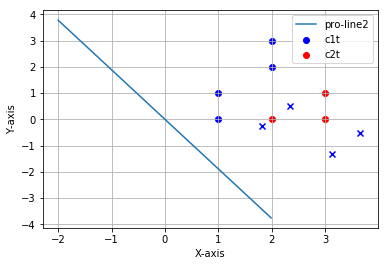

In [401]:
plt.scatter(c1t.tolist()[0], c1t.tolist()[1],label="c1t",c='b')
plt.scatter(c2t.tolist()[0], c2t.tolist()[1], label="c2t",c='r')
#plt.scatter(normdata1[0],normdata1[1],marker='+',c='b', label="c1-normalized")
#plt.scatter(normdata2[0],normdata2[1],marker='+',c='r', label="c2-normalized")
plt.plot(xAxis, wkx, label="pro-line2")
plt.scatter(projc1list[0],projc1list[1], marker='x', c='b')
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.savefig("proj1_4.jpg")